In [3]:
import pandas as pd
df_balance=pd.read_csv("balance_scale.txt",sep=",",header=None)
df_balance

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [4]:
#lets provide column names to the dataframe
df_balance.columns=["target","att1","att2","att3","att4"]

In [5]:
#Lets check whether null values are present or not
df_balance.isnull().sum()
#there are no null values

target    0
att1      0
att2      0
att3      0
att4      0
dtype: int64

In [6]:
#lets describe the dataframe
df_balance.describe()

,att1,att2,att3,att4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [7]:
#lets chcek the correlation
df_balance.corr()

,att1,att2,att3,att4
att1,1.0,0.0,0.0,0.0
att2,0.0,1.0,0.0,0.0
att3,0.0,0.0,1.0,0.0
att4,0.0,0.0,0.0,1.0


In [8]:
#lets chcek the skewness of the dataset
df_balance.skew()
#there is no skewness at all

att1    0.0
att2    0.0
att3    0.0
att4    0.0
dtype: float64

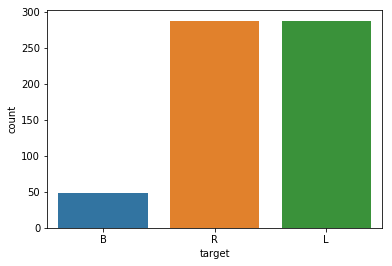

In [11]:
#Lets chcek the count of each type of target class
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="target",data=df_balance)
plt.show()
#count of B type is very less
#L and R have equal counts

In [12]:
#lets divide input and output
df_x=df_balance.drop(columns=["target"])
y=df_balance[["target"]]

In [13]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

F:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [14]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

F:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,

In [15]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.10,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [16]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    print("Mean roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").mean())
    print("standard deviation in roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").std())
    print(cross_val_score(model,x,y,cv=10,scoring="roc_auc"))

In [21]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=10,scoring="roc_auc")
y1 = label_binarize(y, classes=[0, 1, 2])
clf.fit(x,y1)
clf.best_params_

{'n_neighbors': 25}

In [23]:
kc=KNeighborsClassifier(n_neighbors=25)
max_aucroc_score(kc,x,y1)

auc roc score corresponding to  42  is  0.7591954022988506
auc roc score corresponding to  43  is  0.7152129817444219
auc roc score corresponding to  44  is  0.6721095334685598
auc roc score corresponding to  45  is  0.7620689655172415
auc roc score corresponding to  46  is  0.7419540229885057
auc roc score corresponding to  47  is  0.7721095334685598
auc roc score corresponding to  48  is  0.7427991886409737
auc roc score corresponding to  49  is  0.7086206896551724
auc roc score corresponding to  50  is  0.7649425287356322
auc roc score corresponding to  51  is  0.7448275862068966
auc roc score corresponding to  52  is  0.6971264367816091
auc roc score corresponding to  53  is  0.7724137931034484
auc roc score corresponding to  54  is  0.7160919540229885
auc roc score corresponding to  55  is  0.767816091954023
auc roc score corresponding to  56  is  0.8106152805949968
auc roc score corresponding to  57  is  0.7649425287356321
auc roc score corresponding to  58  is  0.702873563218390

56

In [25]:
#Lets chcek the cross val score
#lets print the scores for KNN classifier
print("KNN CLASSIFIER\n\n")
model_evaluation(kc,x,y1)

KNN CLASSIFIER


Mean roc auc score for classifier:  0.936264062648981
standard deviation in roc auc score for classifier:  0.029589198947794684
[0.92966274 0.89980114 0.93850559 0.93064557 0.9654808  0.95717189
 0.95080532 0.97637047 0.87150704 0.94269006]


In [32]:
#Lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y1)

auc roc score corresponding to  42  is  0.6915483434753211
auc roc score corresponding to  43  is  0.7760649087221095
auc roc score corresponding to  44  is  0.7846855983772819
auc roc score corresponding to  45  is  0.7317782285327924
auc roc score corresponding to  46  is  0.7884381338742393
auc roc score corresponding to  47  is  0.7412778904665314
auc roc score corresponding to  48  is  0.7576402974983095
auc roc score corresponding to  49  is  0.9039891818796484
auc roc score corresponding to  50  is  0.8821501014198784
auc roc score corresponding to  51  is  0.8361392832995268
auc roc score corresponding to  52  is  0.7564908722109532
auc roc score corresponding to  53  is  0.7527721433400947
auc roc score corresponding to  54  is  0.6910074374577416
auc roc score corresponding to  55  is  0.7596686950642325
auc roc score corresponding to  56  is  0.8467545638945233
auc roc score corresponding to  57  is  0.7530764029749831
auc roc score corresponding to  58  is  0.75970250169033

96

In [33]:
#lets use cross_val_score
#Lets print the scores of decision tree
print("Decision tree CLASSIFIER\n\n")
model_evaluation(dc,df_x,y1)

Decision tree CLASSIFIER


Mean roc auc score for classifier:  0.7293307925747667
standard deviation in roc auc score for classifier:  0.061934298061911974
[0.77162658 0.64670611 0.75446844 0.76644732 0.7592943  0.74498178
 0.74842437 0.76842028 0.76902657 0.57284076]


In [35]:
#Lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(df_x,y1)
clf.best_params_

{'n_estimators': 500}

In [37]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y1)

auc roc score corresponding to  42  is  0.8755578093306288
auc roc score corresponding to  43  is  0.7780933062880324
auc roc score corresponding to  44  is  0.785868830290737
auc roc score corresponding to  45  is  0.8459432048681541
auc roc score corresponding to  46  is  0.7723461798512509
auc roc score corresponding to  47  is  0.7818458417849898
auc roc score corresponding to  48  is  0.7645706558485462
auc roc score corresponding to  49  is  0.8764029749830966
auc roc score corresponding to  50  is  0.8519945909398242
auc roc score corresponding to  51  is  0.8574374577417173
auc roc score corresponding to  52  is  0.8600067613252197
auc roc score corresponding to  53  is  0.779817444219067
auc roc score corresponding to  54  is  0.7542596348884382
auc roc score corresponding to  55  is  0.8192021636240702
auc roc score corresponding to  56  is  0.8315415821501014
auc roc score corresponding to  57  is  0.8048343475321164
auc roc score corresponding to  58  is  0.7732251521298174

91

In [38]:
#lets chcek the cross_val score
#Lets print the scores of Random forest
print("Random forest CLASSIFIER\n\n")
model_evaluation(rf_clf,df_x,y1)

Random forest CLASSIFIER


Mean roc auc score for classifier:  0.8852324494038177
standard deviation in roc auc score for classifier:  0.028035801371429383
[0.88423583 0.83587462 0.84193585 0.85818671 0.86629675 0.88760462
 0.85921452 0.90368827 0.93198093 0.93714575]


In [51]:
#we will use random forest as a final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 91,test_size=0.10,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
y_test = label_binarize(y_test, classes=[0, 1, 2])
y_pred = label_binarize(y_pred, classes=[0, 1, 2])
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[ 2  2  1]
 [ 2 27  0]
 [ 5  0 24]]
classification report 
               precision    recall  f1-score   support

           0       0.22      0.40      0.29         5
           1       0.93      0.93      0.93        29
           2       0.96      0.83      0.89        29

   micro avg       0.84      0.84      0.84        63
   macro avg       0.70      0.72      0.70        63
weighted avg       0.89      0.84      0.86        63

AUC ROC Score:  0.8249492900608519
